In [ ]:
!pip3 install statsbombpy
!pip3 install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 1.7 MB/s 
     |████████████████████████████████| 152 kB 8.8 MB/s 
     |████████████████████████████████| 127 kB 51.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 1.6 MB/s 


# MODULE IMPORT

In [ ]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import pandas as pd
import xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier

In [ ]:
#Looking at competitions
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


# LA-LIGA SHOTS ANALYSIS
We have extracted all possible shots from the la-liga. They data is from 17 seasons and a total of 12838 shots are used to make the visualization.
1) Heatmaps (2D Histograms) for shot and goal location are plotted using MPL soccer.

2) Heatmap of proportion of goals resulting from shots is plotted.

3) Using seaborn we have futher analysed these shots into the following categories.

    1) Shot Techniques
    2) Shot Body Part
    3) Shot Type

In [ ]:
# La-Liga Season 2020-2021 Analysis
#Training Dataset La-Liga
comp_id = 11
season_id = [90,42,4,1,2,27,26,25,24,23,22,21,41,40,39,38,37]
match_count = 0
test_dict = {}

for season in season_id:
  #print(season)
  match_ids = sb.matches(competition_id=comp_id, season_id=season).match_id.unique()
  for match in match_ids:
    match_count = match_count+1
    shot_events = sb.events(match_id=match, split=True, flatten_attrs=True)["shots"]
    match_data = {'events': shot_events}
    test_dict[str(match)] = match_data

df = pd.DataFrame()
for key in test_dict.keys():
  event = test_dict[key]['events']
  df = df.append(event)

print(f"Testing Dataframe Specs \n Dataframe Shape: {df.shape} \n Dataset columns: {df.columns}")



Testing Dataframe Specs 
 Dataframe Shape: (12838, 39) 
 Dataset columns: Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_key_pass_id',
       'shot_technique', 'shot_first_time', 'shot_outcome', 'shot_type',
       'shot_body_part', 'shot_freeze_frame', 'possession_team_id',
       'player_id', 'shot_one_on_one', 'under_pressure', 'shot_aerial_won',
       'shot_deflected', 'out', 'off_camera', 'shot_open_goal',
       'shot_saved_off_target', 'shot_saved_to_post', 'shot_redirect',
       'shot_follows_dribble'],
      dtype='object')


In [ ]:
print('*******La-Liga Analysis******')
print('Total Season:', len(season_id))
print('Total Matches: ', match_count)
print('Total Shots: ', df.shape[0])
goals = df[df['shot_outcome'] == 'Goal']
print('Total Goal: ', goals.shape[0])

*******La-Liga Analysis******
Total Season: 17
Total Matches:  520
Total Shots:  12838
Total Goal:  1756


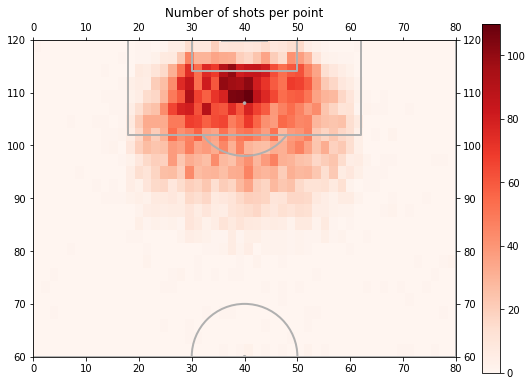

*****************************************************************


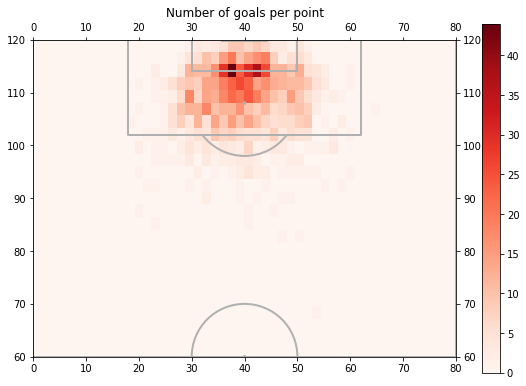

In [ ]:
shot_viz = df[['index','minute','team','player', 'location', 'shot_end_location', 'shot_technique', 'shot_outcome', 'shot_type','shot_body_part','shot_freeze_frame','shot_statsbomb_xg']]
shot_viz = shot_viz[shot_viz.shot_type != 'Free Kick']
shot_viz = shot_viz[shot_viz.shot_type != 'Penalty']
goals_viz = shot_viz[shot_viz['shot_outcome'] == 'Goal']
goals_viz = pd.DataFrame(goals_viz).reset_index()
shots_viz = shot_viz.drop(['index'], axis=1)


#Two dimensional histogram
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

shot_locations = list(shots_viz['location'])
goal_locations = list(goals_viz['location'])

# shot_df = pd.DataFrame(shot_locations, columns = ["X","Y"])

shotViz_df = pd.DataFrame(shots_viz['location'].to_list(), columns=['X','Y'])
goalViz_df = pd.DataFrame(goals_viz['location'].to_list(), columns=['X','Y'])


H_Shot=np.histogram2d(shotViz_df['X'], shotViz_df['Y'],bins=50,range=[[0, 120],[0, 80]])
H_Shot2=np.histogram2d(goalViz_df['X'], goalViz_df['Y'],bins=50,range=[[0, 120],[0, 80]])

#Shots
pitch = VerticalPitch(pitch_type='statsbomb',half=True, axis=True, label=True, tick=True)
fig, ax = pitch.draw(figsize=(8, 10))
pos=ax.imshow(H_Shot[0], extent=[0,80,120,0], aspect='auto',cmap=plt.cm.Reds)
plt.colorbar(pos, ax=ax, shrink=0.5)
ax.set_title('Number of shots per point')
plt.xlim((0,80))
plt.ylim((60,120))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

print("*****************************************************************")
#Goal
pitch2 = VerticalPitch(pitch_type='statsbomb',half=True, axis=True, label=True, tick=True)
fig2, ax2 = pitch.draw(figsize=(8, 10))
pos2=ax2.imshow(H_Shot2[0], extent=[0,80,120,0], aspect='auto',cmap=plt.cm.Reds)
plt.colorbar(pos2, ax=ax2, shrink=0.5)
ax2.set_title('Number of goals per point')
plt.xlim((0,80))
plt.ylim((60,120))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


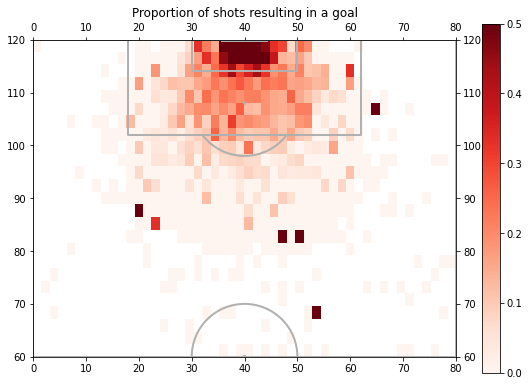

In [ ]:
#Probability of scoring from different points
pitch = VerticalPitch(pitch_type='statsbomb',half=True, axis=True, label=True, tick=True)
fig, ax = pitch.draw(figsize=(8, 10))
pos=ax.imshow(H_Shot2[0]/H_Shot[0], extent=[0,80,120,0], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
plt.colorbar(pos, ax=ax, shrink=0.5)
ax.set_title('Proportion of shots resulting in a goal')
plt.xlim((0,80))
plt.ylim((60,120))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

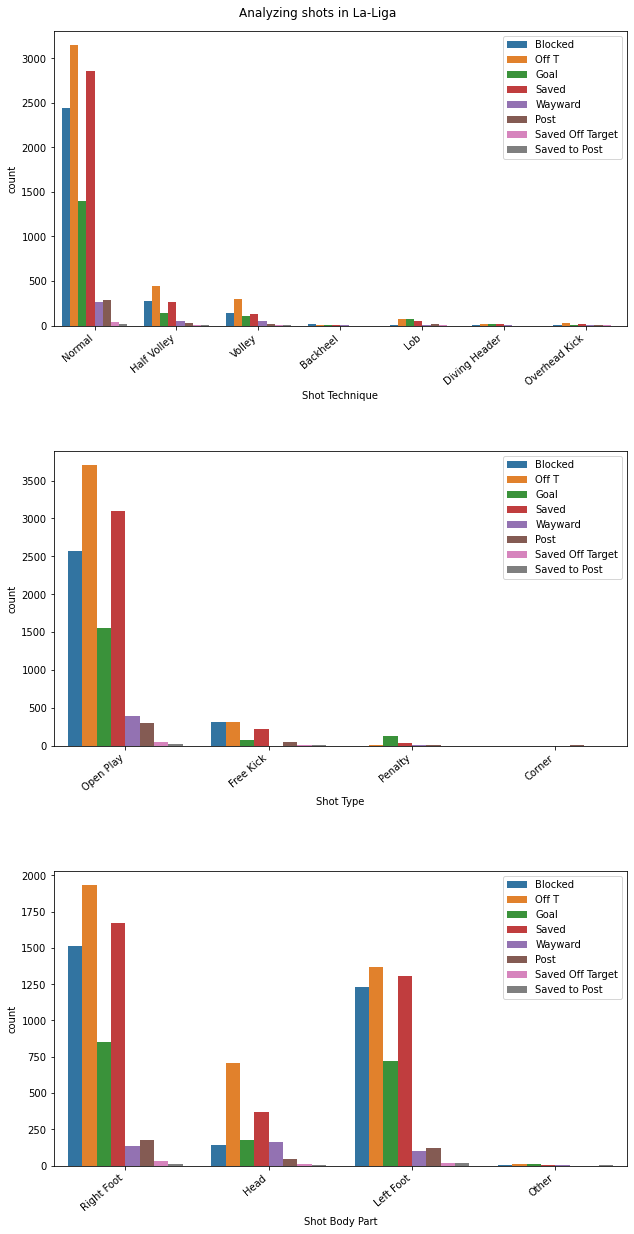

In [ ]:
#Analysing Shots
import seaborn as sns
visulaization_df = df[['shot_technique', 'shot_outcome', 'shot_type', 'shot_body_part',]]
visulaization_df.columns = ['Shot Technique', 'Shot Outcome', 'Shot Type', 'Shot Body Part']

fig, ax = plt.subplots(3, 1,figsize=[10,18])
ax = ax.flatten()
i=0

for col in visulaization_df.select_dtypes(include='object'):
    if col != 'Shot Outcome' and visulaization_df[col].nunique() <= 22:
        sns.countplot(x=col, hue="Shot Outcome", data=visulaization_df, ax=ax[i])
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=40, ha="right")
        ax[i].legend(loc="upper right")
        i=i+1

fig.suptitle('Analyzing shots in La-Liga')
fig.tight_layout(pad=5.0)
fig.show()


# TESTING DATA PREPERATIONS

Our testing consists of 2 different datesets.

1) We have extracted about 500 shots from Champions league data.

2) We have also taken about 1200 shots from la-liga data.

We will test our models on these 2 different datasets.

In [ ]:
### TESTING DATA SET (CHAMPIONS LEAGUE)

import pandas as pd

comp_id = 16
season_id = [1,4,2,27,26,25,24,23,22,21,41,39,37,44]

test_dict = {}

for season in season_id:
  #print(season)
  match_ids = sb.matches(competition_id=comp_id, season_id=season).match_id.unique()
  for match in match_ids:

    lineup = sb.lineups(match_id=match)
    shot_events = sb.events(match_id=match, split=True, flatten_attrs=True)["shots"]

    match_data = {'lineup': lineup, 'events': shot_events}

    test_dict[str(match)] = match_data




#print(main_dict['22912']['events'].columns)
print("***********************************************************")
test_df = pd.DataFrame()
for key in test_dict.keys():
  event = test_dict[key]['events']
  test_df = test_df.append(event)

print(f"Testing Dataframe Specs \n Dataframe Shape: {test_df.shape} \n Dataset columns: {test_df.columns}")

***********************************************************
Testing Dataframe Specs 
 Dataframe Shape: (456, 35) 
 Dataset columns: Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_key_pass_id',
       'shot_outcome', 'shot_type', 'shot_body_part', 'shot_technique',
       'shot_freeze_frame', 'possession_team_id', 'player_id',
       'under_pressure', 'shot_first_time', 'shot_one_on_one',
       'shot_aerial_won', 'shot_redirect', 'out', 'shot_deflected',
       'shot_open_goal'],
      dtype='object')


In [ ]:
# As champions league only have 456 shots we have taken some seasons from La-liga, the rest of la-liga is used for training
comp_id = 11
season_id = [39,38,37]


test2_dict = {}

for season in season_id:
  #print(season)
  match_ids = sb.matches(competition_id=comp_id, season_id=season).match_id.unique()
  for match in match_ids:

    lineup = sb.lineups(match_id=match)
    shot_events = sb.events(match_id=match, split=True, flatten_attrs=True)["shots"]

    match_data = {'lineup': lineup, 'events': shot_events}

    test2_dict[str(match)] = match_data

print("***********************************************************")
test2_df = pd.DataFrame()
for key in test2_dict.keys():
  event = test2_dict[key]['events']
  test2_df = test2_df.append(event)

print(f"Testing Dataframe Specs \n Dataframe Shape: {test2_df.shape} \n Dataset columns: {test2_df.columns}")

***********************************************************
Testing Dataframe Specs 
 Dataframe Shape: (1272, 38) 
 Dataset columns: Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_one_on_one', 'shot_statsbomb_xg', 'shot_end_location',
       'shot_key_pass_id', 'shot_outcome', 'shot_technique', 'shot_body_part',
       'shot_type', 'shot_freeze_frame', 'possession_team_id', 'player_id',
       'shot_first_time', 'shot_open_goal', 'under_pressure',
       'shot_aerial_won', 'shot_saved_off_target', 'out', 'shot_deflected',
       'shot_saved_to_post', 'shot_redirect', 'off_camera'],
      dtype='object')


# TRAINING DATA PREPERATION

Our Training dataset contains 10500 shots from the 14 seasons of la-liga.

In [ ]:
#Training Dataset La-Liga
comp_id = 11
season_id = [90,42,4,1,2,27,26,25,24,23,22,21,41,40]


train_dict = {}

for season in season_id:
  #print(season)
  match_ids = sb.matches(competition_id=comp_id, season_id=season).match_id.unique()
  for match in match_ids:

    lineup = sb.lineups(match_id=match)
    shot_events = sb.events(match_id=match, split=True, flatten_attrs=True)["shots"]

    match_data = {'lineup': lineup, 'events': shot_events}

    train_dict[str(match)] = match_data

print("***********************************************************")
train_df = pd.DataFrame()
for key in train_dict.keys():
  event = train_dict[key]['events']
  train_df = train_df.append(event)

***********************************************************


# FEATURE SELECTION AND CREATION
In this section the following steps are followed.

1) We have used our domain knowledge to cut down on the features and select features that have a potential to affect an outcome of a shot.

2) New features are created

    1) Angle to goal
    2) Distance to goal
    3) Player count

3) The following features are encoded

    1) shot_outcome
    2) shot_body_part
    3) shot_technique

In [ ]:
#training data from la liga

shot = train_df[['index','minute','team','player', 'location', 'shot_end_location', 'shot_technique', 'shot_outcome', 'shot_type','shot_body_part','shot_freeze_frame','shot_statsbomb_xg','play_pattern']]

shot = shot[shot.shot_type != 'Free Kick']
shot = shot[shot.shot_type != 'Penalty']

goals = shot[shot['shot_outcome'] == 'Goal']
goals = pd.DataFrame(goals).reset_index()
shots = shot.drop(['index'], axis=1)

#testing on champions league data

shot_test = test_df[['index','minute','team','player', 'location', 'shot_end_location', 'shot_technique', 'shot_outcome', 'shot_type','shot_body_part','shot_freeze_frame','shot_statsbomb_xg','play_pattern']]

shot_test = shot_test[shot_test.shot_type != 'Free Kick']
shot_test = shot_test[shot_test.shot_type != 'Penalty']

goals_test = shot_test[shot_test['shot_outcome'] == 'Goal']
goals_test = pd.DataFrame(goals_test).reset_index()
shots2 = shot_test.drop(['index'], axis=1)



#testing dataframe 2 (la liga)
shot_test2 = test2_df[['index','minute','team','player', 'location', 'shot_end_location', 'shot_technique', 'shot_outcome', 'shot_type','shot_body_part','shot_freeze_frame','shot_statsbomb_xg','play_pattern']]

shot_test2 = shot_test2[shot_test2.shot_type != 'Free Kick']
shot_test2 = shot_test2[shot_test2.shot_type != 'Penalty']

goals_test2 = shot_test2[shot_test2['shot_outcome'] == 'Goal']
goals_test2 = pd.DataFrame(goals_test2).reset_index()
shots3 = shot_test2.drop(['index'], axis=1)

print('Training Shape: ', shots.shape)
print('Testing Shape1: ', shots2.shape)
print('Testing Shape2: ', shots3.shape)

Training Shape:  (10578, 12)
Testing Shape1:  (397, 12)
Testing Shape2:  (1123, 12)


In [ ]:
#Feature creation on training set
from sklearn import preprocessing
import numpy as np

data_model = shots.copy()
data_model = data_model.dropna()


label_encoder = preprocessing.LabelEncoder()

#Encoding play_pattern column
data_model['play_pattern'] = label_encoder.fit_transform(data_model['play_pattern'])
data_model['play_pattern'].unique()


def label_encode(type):
  '''Function to encode shot outcome column.'''
  val = type['shot_outcome']
  #print(val)
  if str(val) == "Goal":
    return 1
  else:
    return 0

def label_encode2(type):
  '''Function to encode shot_body_part column.'''
  val = type['shot_body_part']
  #print(val)
  if str(val) == "Right Foot":
    return 1
  elif str(val) == "Left Foot":
    return 2
  elif str(val) == "Head":
    return 3
  elif str(val) == "Other":
    return 4

def label_encode3(type):
  '''Function to encode shot_technique column'''
  val = type['shot_technique']
  #print(val)
  if str(val) == "Normal":
    return 1
  elif str(val) == "Half Volley":
    return 2
  elif str(val) == "Volley":
    return 3
  elif str(val) == "Backheel":
    return 4
  elif str(val) == "Lob":
    return 5
  elif str(val) == "Diving Header":
    return 6
  elif str(val) == "Overhead Kick":
    return 7

# Calculate Distance and Angle when the shot was taken
distance = []
angle = []
for i, row in shots.iterrows():
  shot_location = row['location']
  player_locations = row['shot_freeze_frame']
  X = row['location'][0]
  Y = row['location'][1]
  x = 120 - X
  y = abs(Y-40)

  dist = np.sqrt((x**2) + (y**2))
  distance.append(dist)

  a = np.arctan((8.00*x)/(x**2+y**2 -((8/2)**2)))
  if a<0:
        a=np.pi+a
  angle.append(a)

data_model['Distance'] = distance
data_model['Angle'] = angle

## No of players in front when the shot was taken.

gx_1 = 120
gy_1 = 44
gx_2 = 120
gy_2 = 36
count = []
for i, row in shots.iterrows():
  shot_location = row['location']
  x = row['location'][0]
  y = row['location'][1]

  player_locations = row['shot_freeze_frame']
  c = 0
  for d in player_locations:
    x_p = d['location'][0]
    y_p = d['location'][1]

    c1 = (gx_1 - x) * (y_p - y) - (gy_1 - y) * (x_p - x)
    c2 = (gx_2 - gx_1) * (y_p - gy_1) - (gy_2 - gy_1) * (x_p - gx_1)
    c3 = (x-gx_2) * (y_p-gy_2) - (y-gy_2) * (x_p-gx_2)
    if (c1<0 and c2<0 and c3<0) or (c1>0 and c2>0 and c3>0):
        c = c + 1

  count.append(c)

data_model['Player_count'] = count
data_model['shot_outcome'] = data_model.apply(lambda row: label_encode(row), axis=1)
data_model['shot_body_part'] = data_model.apply(lambda row: label_encode2(row), axis=1)
data_model['shot_technique'] = data_model.apply(lambda row: label_encode3(row), axis=1)
train_model = data_model
train_model.head(10)


,minute,team,player,location,shot_end_location,shot_technique,shot_outcome,shot_type,shot_body_part,shot_freeze_frame,shot_statsbomb_xg,play_pattern,Distance,Angle,Player_count
0,10,Real Betis,Borja Iglesias Quintas,"[115.3, 34.7]","[115.9, 34.9]",1,0,Open Play,1,"[{'location': [108.6, 10.9], 'player': {'id': ...",0.105435,6,7.083784,0.833008,2
1,17,Barcelona,Ousmane Dembélé,"[103.3, 44.6]","[104.2, 44.5]",1,0,Open Play,1,"[{'location': [114.9, 41.4], 'player': {'id': ...",0.083355,2,17.321951,0.439639,1
2,24,Real Betis,Juan Miguel Jiménez López,"[114.0, 32.4]","[120.0, 34.8, 1.6]",1,0,Open Play,3,"[{'location': [96.2, 46.2], 'player': {'id': 2...",0.212048,8,9.682975,0.553031,1
3,27,Barcelona,Clément Lenglet,"[113.8, 42.7]","[120.0, 34.6, 1.3]",1,0,Open Play,3,"[{'location': [94.9, 11.9], 'player': {'id': 2...",0.263897,0,6.762396,1.030822,1
4,37,Real Betis,Borja Iglesias Quintas,"[111.7, 42.4]","[120.0, 42.2, 0.3]",1,1,Open Play,2,"[{'location': [111.8, 61.3], 'player': {'id': ...",0.436733,8,8.640023,0.847294,1
5,47,Barcelona,Martin Braithwaite Christensen,"[108.7, 40.1]","[120.0, 37.6, 5.1]",1,0,Open Play,3,"[{'location': [84.7, 17.3], 'player': {'id': 5...",0.064925,2,11.300442,0.680392,1
6,47,Barcelona,Óscar Mingueza García,"[101.8, 44.9]","[118.1, 38.3, 1.5]",1,0,Open Play,1,"[{'location': [93.9, 61.2], 'player': {'id': 6...",0.042937,8,18.848077,0.405408,4
7,48,Barcelona,Antoine Griezmann,"[117.0, 28.1]","[117.2, 41.1]",1,0,Open Play,3,"[{'location': [100.3, 44.2], 'player': {'id': ...",0.027969,0,12.272327,0.176439,0
8,52,Barcelona,Antoine Griezmann,"[111.8, 35.3]","[113.2, 35.2]",2,0,Open Play,2,"[{'location': [104.4, 26.0], 'player': {'id': ...",0.104232,8,9.451455,0.729816,1
9,55,Real Betis,Juan Miguel Jiménez López,"[107.7, 34.4]","[111.7, 36.7, 0.2]",1,0,Open Play,1,"[{'location': [100.8, 11.6], 'player': {'id': ...",0.405702,8,13.514807,0.533375,1


In [ ]:
#Feature creation for testing dataframe
import numpy as np
from sklearn import preprocessing

data_model2 = shots2.copy()
data_model2 = data_model2.dropna()


label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data_model2['play_pattern'] = label_encoder.fit_transform(data_model2['play_pattern'])

data_model2['play_pattern'].unique()


def label_encode(type):
  '''Function to encode shot outcome column.'''
  val = type['shot_outcome']
  #print(val)
  if str(val) == "Goal":
    return 1
  else:
    return 0

def label_encode2(type):
  '''Function to encode shot_body_part column.'''
  val = type['shot_body_part']
  #print(val)
  if str(val) == "Right Foot":
    return 1
  elif str(val) == "Left Foot":
    return 2
  elif str(val) == "Head":
    return 3
  elif str(val) == "Other":
    return 4

def label_encode3(type):
  '''Function to encode shot_technique column.'''
  val = type['shot_technique']
  #print(val)
  if str(val) == "Normal":
    return 1
  elif str(val) == "Half Volley":
    return 2
  elif str(val) == "Volley":
    return 3
  elif str(val) == "Backheel":
    return 4
  elif str(val) == "Lob":
    return 5
  elif str(val) == "Diving Header":
    return 6
  elif str(val) == "Overhead Kick":
    return 7

# Distance and Angle when the shot was taken
distance = []
angle = []
for i, row in shots2.iterrows():
  shot_location = row['location']
  player_locations = row['shot_freeze_frame']
  X = row['location'][0]
  Y = row['location'][1]
  x = 120 - X
  y = abs(Y-40)

  dist = np.sqrt((x**2) + (y**2))
  distance.append(dist)

  a = np.arctan((8.00*x)/(x**2+y**2 -((8/2)**2)))
  if a<0:
        a=np.pi+a
  angle.append(a)

data_model2['Distance'] = distance
data_model2['Angle'] = angle

## No of players in front when the shot was taken.

gx_1 = 120
gy_1 = 44
gx_2 = 120
gy_2 = 36
count = []
for i, row in shots2.iterrows():
  shot_location = row['location']
  x = row['location'][0]
  y = row['location'][1]

  player_locations = row['shot_freeze_frame']
  c = 0
  for d in player_locations:
    x_p = d['location'][0]
    y_p = d['location'][1]

    c1 = (gx_1 - x) * (y_p - y) - (gy_1 - y) * (x_p - x)
    c2 = (gx_2 - gx_1) * (y_p - gy_1) - (gy_2 - gy_1) * (x_p - gx_1)
    c3 = (x-gx_2) * (y_p-gy_2) - (y-gy_2) * (x_p-gx_2)
    if (c1<0 and c2<0 and c3<0) or (c1>0 and c2>0 and c3>0):
        c = c + 1

  count.append(c)

data_model2['Player_count'] = count

# print(shot['shot_outcome'])
data_model2['shot_outcome'] = data_model2.apply(lambda row: label_encode(row), axis=1)
data_model2['shot_body_part'] = data_model2.apply(lambda row: label_encode2(row), axis=1)
data_model2['shot_technique'] = data_model2.apply(lambda row: label_encode3(row), axis=1)
test_model = data_model2
test_model.head(10)

,minute,team,player,location,shot_end_location,shot_technique,shot_outcome,shot_type,shot_body_part,shot_freeze_frame,shot_statsbomb_xg,play_pattern,Distance,Angle,Player_count
0,2,Liverpool,Georginio Wijnaldum,"[98.1, 52.1]","[102.0, 50.5]",1,0,Open Play,1,"[{'location': [98.0, 48.4], 'player': {'id': 5...",0.033683,6,25.020392,0.279676,2
1,5,Liverpool,Mohamed Salah,"[96.6, 51.5]","[99.2, 50.4]",1,0,Open Play,2,"[{'location': [109.0, 39.9], 'player': {'id': ...",0.023530,2,26.073166,0.274870,5
2,7,Liverpool,Roberto Firmino Barbosa de Oliveira,"[112.1, 30.6]","[120.0, 25.5, 6.0]",1,0,Open Play,3,"[{'location': [102.1, 2.5], 'player': {'id': 3...",0.034307,8,12.278844,0.438498,1
3,10,Real Madrid,Marcelo Vieira da Silva Júnior,"[94.5, 26.9]","[120.0, 49.8, 0.2]",1,0,Open Play,2,"[{'location': [100.2, 11.0], 'player': {'id': ...",0.014634,2,28.668101,0.247937,1
4,13,Liverpool,James Philip Milner,"[101.2, 30.6]","[103.3, 31.4]",1,0,Open Play,2,"[{'location': [90.9, 32.3], 'player': {'id': 3...",0.026255,2,21.019039,0.339538,4
5,13,Liverpool,Mohamed Salah,"[104.5, 41.1]","[106.1, 40.9]",1,0,Open Play,2,"[{'location': [116.9, 39.6], 'player': {'id': ...",0.076005,2,15.538983,0.502833,2
6,13,Liverpool,Sadio Mané,"[103.7, 35.9]","[106.2, 36.4]",1,0,Open Play,1,"[{'location': [103.6, 35.1], 'player': {'id': ...",0.053768,2,16.807736,0.455056,2
7,14,Real Madrid,Cristiano Ronaldo dos Santos Aveiro,"[111.7, 58.7]","[120.0, 40.7, 3.8]",1,0,Open Play,1,"[{'location': [118.1, 45.0], 'player': {'id': ...",0.026850,6,20.459228,0.163464,1
8,17,Liverpool,Virgil van Dijk,"[116.5, 37.1]","[120.0, 35.9, 5.5]",1,0,Open Play,3,"[{'location': [117.4, 37.2], 'player': {'id': ...",0.298974,0,4.545327,1.405879,1
9,22,Liverpool,Roberto Firmino Barbosa de Oliveira,"[105.7, 41.4]","[111.0, 41.0]",1,0,Open Play,1,"[{'location': [120.0, 17.6], 'player': {'id': ...",0.100903,8,14.368368,0.540921,4


In [ ]:
#Feature creation for testing dataframe
import numpy as np
from sklearn import preprocessing

data_model3 = shots3.copy()
data_model3 = data_model3.dropna()


label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data_model3['play_pattern'] = label_encoder.fit_transform(data_model3['play_pattern'])

data_model3['play_pattern'].unique()


def label_encode(type):
  '''Function to encode shot outcome column.'''
  val = type['shot_outcome']
  #print(val)
  if str(val) == "Goal":
    return 1
  else:
    return 0

def label_encode2(type):
  '''Function to encode shot_body_part column.'''
  val = type['shot_body_part']
  #print(val)
  if str(val) == "Right Foot":
    return 1
  elif str(val) == "Left Foot":
    return 2
  elif str(val) == "Head":
    return 3
  elif str(val) == "Other":
    return 4

def label_encode3(type):
  '''Function to encode shot_technique column.'''
  val = type['shot_technique']
  #print(val)
  if str(val) == "Normal":
    return 1
  elif str(val) == "Half Volley":
    return 2
  elif str(val) == "Volley":
    return 3
  elif str(val) == "Backheel":
    return 4
  elif str(val) == "Lob":
    return 5
  elif str(val) == "Diving Header":
    return 6
  elif str(val) == "Overhead Kick":
    return 7

# Distance and Angle when the shot was taken
distance = []
angle = []
for i, row in shots3.iterrows():
  shot_location = row['location']
  player_locations = row['shot_freeze_frame']
  X = row['location'][0]
  Y = row['location'][1]
  x = 120 - X
  y = abs(Y-40)

  dist = np.sqrt((x**2) + (y**2))
  distance.append(dist)

  a = np.arctan((8.00*x)/(x**2+y**2 -((8/2)**2)))
  if a<0:
        a=np.pi+a
  angle.append(a)

data_model3['Distance'] = distance
data_model3['Angle'] = angle

## No of players in front when the shot was taken.

gx_1 = 120
gy_1 = 44
gx_2 = 120
gy_2 = 36
count = []
for i, row in shots3.iterrows():
  shot_location = row['location']
  x = row['location'][0]
  y = row['location'][1]

  player_locations = row['shot_freeze_frame']
  c = 0
  for d in player_locations:
    x_p = d['location'][0]
    y_p = d['location'][1]

    c1 = (gx_1 - x) * (y_p - y) - (gy_1 - y) * (x_p - x)
    c2 = (gx_2 - gx_1) * (y_p - gy_1) - (gy_2 - gy_1) * (x_p - gx_1)
    c3 = (x-gx_2) * (y_p-gy_2) - (y-gy_2) * (x_p-gx_2)
    if (c1<0 and c2<0 and c3<0) or (c1>0 and c2>0 and c3>0):
        c = c + 1

  count.append(c)

data_model3['Player_count'] = count

# print(shot['shot_outcome'])
data_model3['shot_outcome'] = data_model3.apply(lambda row: label_encode(row), axis=1)
data_model3['shot_body_part'] = data_model3.apply(lambda row: label_encode2(row), axis=1)
data_model3['shot_technique'] = data_model3.apply(lambda row: label_encode3(row), axis=1)
test2_model = data_model3
test2_model.head(10)

,minute,team,player,location,shot_end_location,shot_technique,shot_outcome,shot_type,shot_body_part,shot_freeze_frame,shot_statsbomb_xg,play_pattern,Distance,Angle,Player_count
0,5,Atlético Madrid,Fernando José Torres Sanz,"[114.2, 24.0]","[120.0, 34.2, 0.7]",1,0,Open Play,3,"[{'location': [113.0, 27.8], 'player': {'id': ...",0.016409,2,17.018813,0.167968,1
1,12,Atlético Madrid,Nuno Ricardo de Oliveira Ribeiro,"[93.9, 31.8]","[120.0, 51.8, 0.8]",1,0,Open Play,1,"[{'location': [109.2, 46.2], 'player': {'id': ...",0.016777,0,27.357814,0.277705,3
3,20,Atlético Madrid,Martin Petrov,"[98.4, 18.8]","[103.7, 23.5]",1,0,Open Play,1,"[{'location': [97.9, 33.8], 'player': {'id': 6...",0.018991,2,30.265492,0.189692,2
4,26,Atlético Madrid,Luciano Martín Galletti,"[100.4, 55.4]","[120.0, 34.6, 0.0]",1,0,Open Play,1,"[{'location': [108.9, 42.7], 'player': {'id': ...",0.022042,6,24.926291,0.253465,2
6,32,Barcelona,Lionel Andrés Messi Cuccittini,"[106.3, 60.0]","[119.0, 43.7, 0.2]",1,0,Open Play,2,"[{'location': [107.9, 58.8], 'player': {'id': ...",0.012270,2,24.242318,0.189414,2
7,35,Barcelona,"Samuel Eto""o Fils","[112.3, 52.6]","[120.0, 48.3, 3.5]",2,0,Open Play,1,"[{'location': [112.4, 51.1], 'player': {'id': ...",0.210781,2,14.766516,0.295923,0
8,36,Atlético Madrid,Fernando José Torres Sanz,"[100.7, 27.0]","[118.8, 37.8, 0.0]",1,0,Open Play,1,"[{'location': [104.7, 28.3], 'player': {'id': ...",0.049355,3,23.269938,0.285778,1
9,38,Barcelona,Lionel Andrés Messi Cuccittini,"[108.7, 35.5]","[120.0, 43.7, 0.5]",1,1,Open Play,2,"[{'location': [115.7, 38.2], 'player': {'id': ...",0.332196,8,12.163059,0.600697,1
10,42,Barcelona,Gianluca Zambrotta,"[100.8, 60.2]","[120.0, 36.8, 1.4]",5,1,Open Play,2,"[{'location': [104.1, 56.2], 'player': {'id': ...",0.128536,8,27.868979,0.199245,2
11,44,Atlético Madrid,Fernando José Torres Sanz,"[88.0, 22.7]","[115.6, 35.6, 0.7]",1,0,Open Play,2,"[{'location': [85.9, 43.2], 'player': {'id': 1...",0.015551,8,36.377053,0.193378,1


# LINEAR REGRESSION

<ipython-input-11-2912549ecf8e>:9: RuntimeWarning: invalid value encountered in true_divide
  prob_goal=np.divide(goalcount_dist[0],shotcount_dist[0])


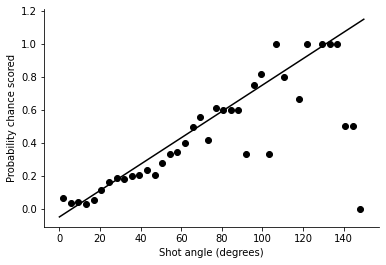

In [ ]:
shots_model = train_model.copy()
goals_model = shots_model[shots_model['shot_outcome'] == 1 ]
#goals_model = goals_model.iloc[:5]
# print(shots_model['Angle'])
# print(goals_model['Angle'])

shotcount_dist=np.histogram(shots_model['Angle']*180/np.pi,bins=40,range=[0, 150])
goalcount_dist=np.histogram(goals_model['Angle']*180/np.pi,bins=40,range=[0, 150])
prob_goal=np.divide(goalcount_dist[0],shotcount_dist[0])

angle=shotcount_dist[1]
midangle= (angle[:-1] + angle[1:])/2
fig,ax=plt.subplots(num=2)
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markerSize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Intercept and Slope
b=[-0.05, 1/125]
x=np.arange(150,step=0.1)
y= b[0] + b[1]*x
ax.plot(x, y, linestyle='solid', color='black')

#LOGISTIC REGRESSION
BUILDING A LOGISTIC REGRESSION MODEL TO PREDICT THE PROBABILTY OF SCORING GIVEN A SHOT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## MODEL BASED ON ANGLE AND DISTANCE

In [ ]:
features = train_model[['Angle', 'Distance']]
target = train_model[['shot_outcome']]

scaled = StandardScaler()
X_scaled = scaled.fit_transform(features)

all_data = X_scaled

X_train = all_data
y_train = target

print('Training features shape', X_train.shape)
print('Training target shape', y_train.shape)

Training features shape (10578, 2)
Training target shape (10578, 1)


In [ ]:
features_test = test_model[['Angle', 'Distance']]
target_test = test_model[['shot_outcome']]
SbXG = test_model[['shot_statsbomb_xg']]

scaled = StandardScaler()
X_scaled_test = scaled.fit_transform(features_test)

all_data_test = X_scaled_test

X_test = all_data_test
y_test = target_test

print('Testing features shape', X_test.shape)
print('Testing target shape', y_test.shape)
print('Statsbomb XG shape', SbXG.shape)

print("***************************************")
#Model preperation on testing data (II)
features_test = test2_model[['Angle', 'Distance']]
target_test = test2_model[['shot_outcome']]
SbXG2 = test2_model[['shot_statsbomb_xg']]

scaled = StandardScaler()
X_scaled_test = scaled.fit_transform(features_test)

all_data_test = X_scaled_test

X_test2 = all_data_test
y_test2 = target_test

print('Testing features shape', X_test2.shape)
print('Testing target shape', y_test2.shape)
print('Statsbomb XG shape', SbXG2.shape)


Testing features shape (397, 2)
Testing target shape (397, 1)
Statsbomb XG shape (397, 1)
***************************************
Testing features shape (1123, 2)
Testing target shape (1123, 1)
Statsbomb XG shape (1123, 1)


In [ ]:
model0 = LogisticRegression(fit_intercept=True, max_iter=20000)
model0.fit(X_train,  y_train)

#Model testing
predicted_classes1_0 = model0.predict(X_test)
predicted_classes2_0 = model0.predict(X_test2)

accuracy1 = accuracy_score(y_test,predicted_classes1_0)
accuracy2 = accuracy_score(y_test2,predicted_classes2_0)

p_pred1 = model0.predict_proba(X_test)
p_pred2 = model0.predict_proba(X_test2)


print("************{GOAL SCORED VS [ANGLE, DISTANCE]**************")

print('Model accuracy on champions league data: ', accuracy1)
print('Model accuracy on La-liga test data: ', accuracy2)

print('intercept:', model0.intercept_)
print('coef:', model0.coef_, end='\n\n')

#print('p_pred:', p_pred, sep='\n', end='\n\n')
#print('p_pred:', predicted_classes, sep='\n', end='\n\n')

#print(p_pred[0])

p_pred1[:,1].shape
p_pred2[:,1].shape

************{GOAL SCORED VS [ANGLE, DISTANCE]**************
Model accuracy on champions league data:  0.8841309823677582
Model accuracy on La-liga test data:  0.8904719501335708
intercept: [-2.16904397]
coef: [[ 0.31546354 -0.72553462]]



(1123,)

In [ ]:
statsXG = np.array(SbXG)
statsXG2 = np.array(SbXG2)

myXg = p_pred1[:,1].reshape(397,1)
myXg2 = p_pred2[:,1].reshape(1123,1)


diff = []
for i in range(len(statsXG)):
  dif = (statsXG[i] - myXg[i])**2
  diff.append(dif)

diff2 = []
for i in range(len(statsXG2)):
  dif = (statsXG2[i] - myXg2[i])**2
  diff2.append(dif)


print('Mean Squared Difference: ', np.mean(diff), end= "\n\n")
print('Mean Squared Difference2: ', np.mean(diff2), end= "\n\n")

Mean Squared Difference:  0.011336682445603652

Mean Squared Difference2:  0.011865534485769194



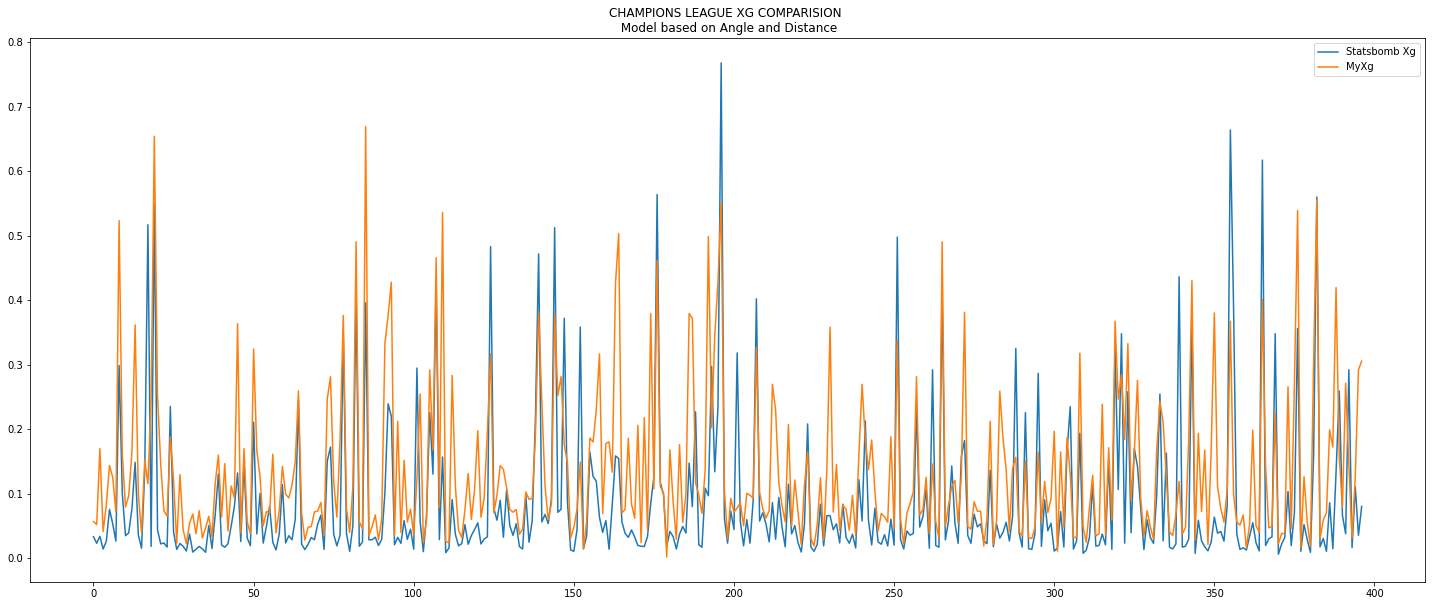

In [ ]:
#Ploting XGS for champions league test dataset
plt.figure(figsize=(25, 10))
plt.title("CHAMPIONS LEAGUE XG COMPARISION \n Model based on Angle and Distance")
plt.plot(statsXG,label="Statsbomb Xg")
plt.plot(myXg, label="MyXg")
#plt.title("Angle, Distance, Body Part, Technique and Player count")
plt.legend()
plt.show()

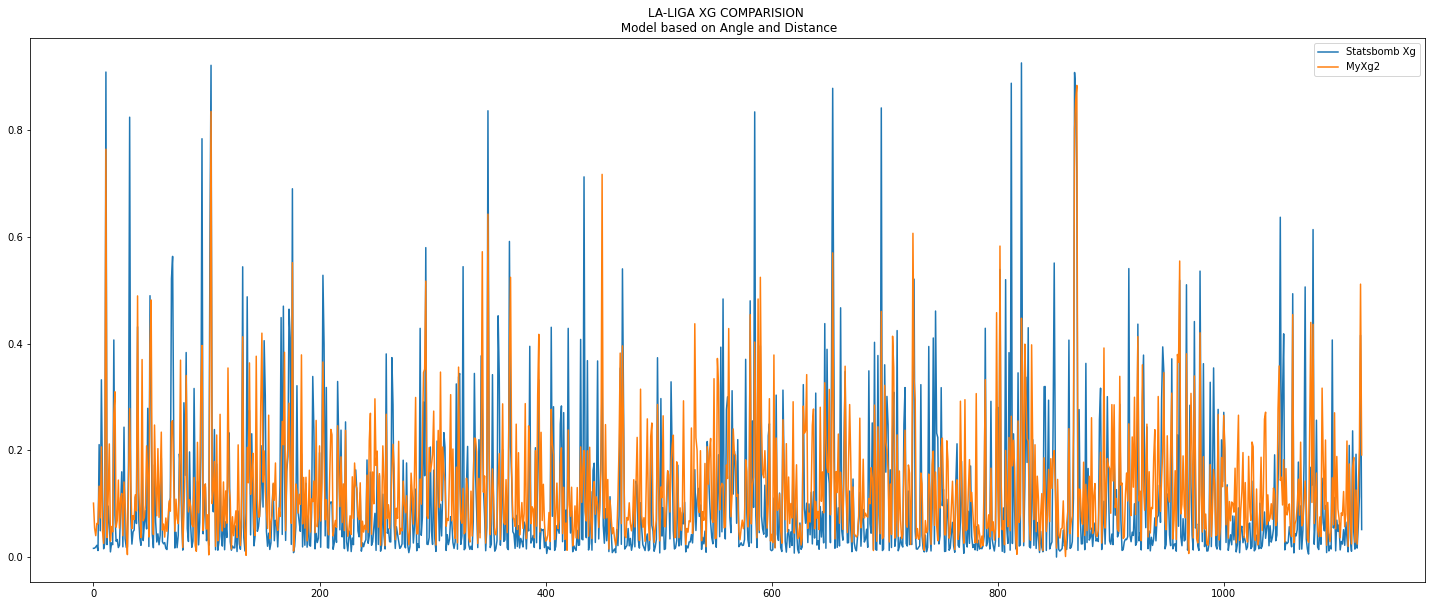

In [ ]:
#Ploting XGS for la liga test dataset
plt.figure(figsize=(25, 10))
plt.title("LA-LIGA XG COMPARISION \n Model based on Angle and Distance")
plt.plot(statsXG2,label="Statsbomb Xg")
plt.plot(myXg2, label="MyXg2")
#plt.title("Angle, Distance, Body Part, Technique and Player count")
plt.legend()
plt.show()

## MODEL BASED ON ANGLE, DISTANCE, BODY PART

In [ ]:
features = train_model[['Angle', 'Distance']]
body_tech = train_model[['shot_body_part']]
target = train_model[['shot_outcome']]

scaled = StandardScaler()
X_scaled = scaled.fit_transform(features)

all_data = np.concatenate((X_scaled, body_tech), 1)

X_train = all_data
y_train = target

print('Training features shape', X_train.shape)
print('Training target shape', y_train.shape)
print("**************************************")
#Model preperation for testing (I)

features_test = test_model[['Angle', 'Distance']]
body_tech_test = test_model[['shot_body_part']]
target_test = test_model[['shot_outcome']]
SbXG = test_model[['shot_statsbomb_xg']]

scaled = StandardScaler()
X_scaled_test = scaled.fit_transform(features_test)

all_data_test = np.concatenate((X_scaled_test, body_tech_test), 1)

X_test = all_data_test
y_test = target_test

print('Testing features shape', X_test.shape)
print('Testing target shape', y_test.shape)
print('Statsbomb XG shape', SbXG.shape)
print("**************************************")

#Model preperation on testing data (II)
features_test = test2_model[['Angle', 'Distance']]
body_tech_test = test2_model[['shot_body_part']]
target_test = test2_model[['shot_outcome']]
SbXG2 = test2_model[['shot_statsbomb_xg']]

scaled = StandardScaler()
X_scaled_test = scaled.fit_transform(features_test)

all_data_test = np.concatenate((X_scaled_test, body_tech_test), 1)

X_test2 = all_data_test
y_test2 = target_test

print('Testing features shape', X_test2.shape)
print('Testing target shape', y_test2.shape)
print('Statsbomb XG shape', SbXG2.shape)


Training features shape (10578, 3)
Training target shape (10578, 1)
**************************************
Testing features shape (397, 3)
Testing target shape (397, 1)
Statsbomb XG shape (397, 1)
**************************************
Testing features shape (1123, 3)
Testing target shape (1123, 1)
Statsbomb XG shape (1123, 1)


In [ ]:
#Model training

model1 = LogisticRegression(fit_intercept=True, max_iter=20000)
model1.fit(X_train,  y_train)

#Model testing
predicted_classes1_1 = model1.predict(X_test)
predicted_classes2_1 = model1.predict(X_test2)

accuracy1 = accuracy_score(y_test,predicted_classes1_1)
accuracy2 = accuracy_score(y_test2,predicted_classes2_1)

p_pred1 = model1.predict_proba(X_test)
p_pred2 = model1.predict_proba(X_test2)


print("************{GOAL SCORED VS [ANGLE, DISTANCE, BODY PART]**************")

print('Model accuracy on champions league data: ', accuracy1)
print('Model accuracy on La-liga test data: ', accuracy2)

print('intercept:', model1.intercept_)
print('coef:', model1.coef_, end='\n\n')

#print('p_pred:', p_pred, sep='\n', end='\n\n')
#print('p_pred:', predicted_classes, sep='\n', end='\n\n')

#print(p_pred[0])

p_pred1[:,1].shape
p_pred2[:,1].shape

************{GOAL SCORED VS [ANGLE, DISTANCE, BODY PART]**************
Model accuracy on champions league data:  0.8967254408060453
Model accuracy on La-liga test data:  0.8833481745325023
intercept: [-1.2803758]
coef: [[ 0.38060027 -0.84356502 -0.56143071]]



(1123,)

In [ ]:
statsXG = np.array(SbXG)
statsXG2 = np.array(SbXG2)

myXg = p_pred1[:,1].reshape(397,1)
myXg2 = p_pred2[:,1].reshape(1123,1)


diff = []
for i in range(len(statsXG)):
  dif = (statsXG[i] - myXg[i])**2
  diff.append(dif)

diff2 = []
for i in range(len(statsXG2)):
  dif = (statsXG2[i] - myXg2[i])**2
  diff2.append(dif)


print('Mean Squared Difference: ', np.mean(diff), end= "\n\n")
print('Mean Squared Difference2: ', np.mean(diff2), end= "\n\n")

Mean Squared Difference:  0.009851893843785021

Mean Squared Difference2:  0.010221345631071438



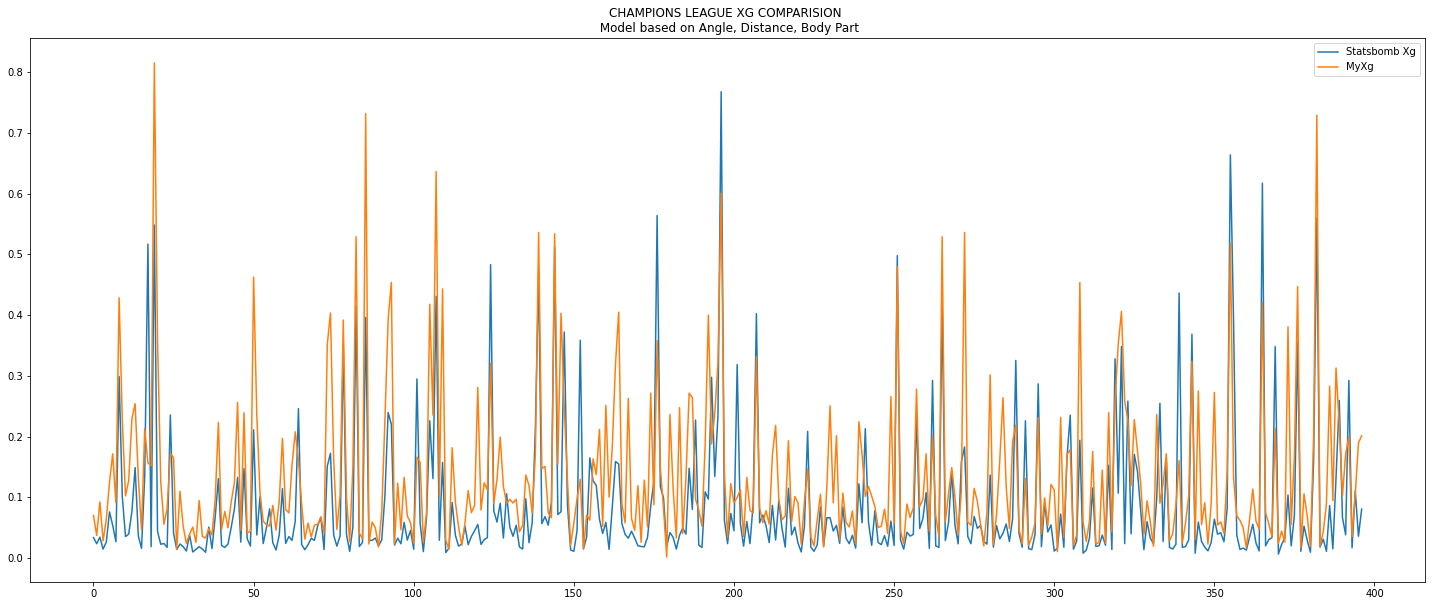

In [ ]:
#Ploting XGS for champions league test dataset
plt.figure(figsize=(25, 10))
plt.title("CHAMPIONS LEAGUE XG COMPARISION \n Model based on Angle, Distance, Body Part")
plt.plot(statsXG,label="Statsbomb Xg")
plt.plot(myXg, label="MyXg")
#plt.title("Angle, Distance, Body Part, Technique and Player count")
plt.legend()
plt.show()

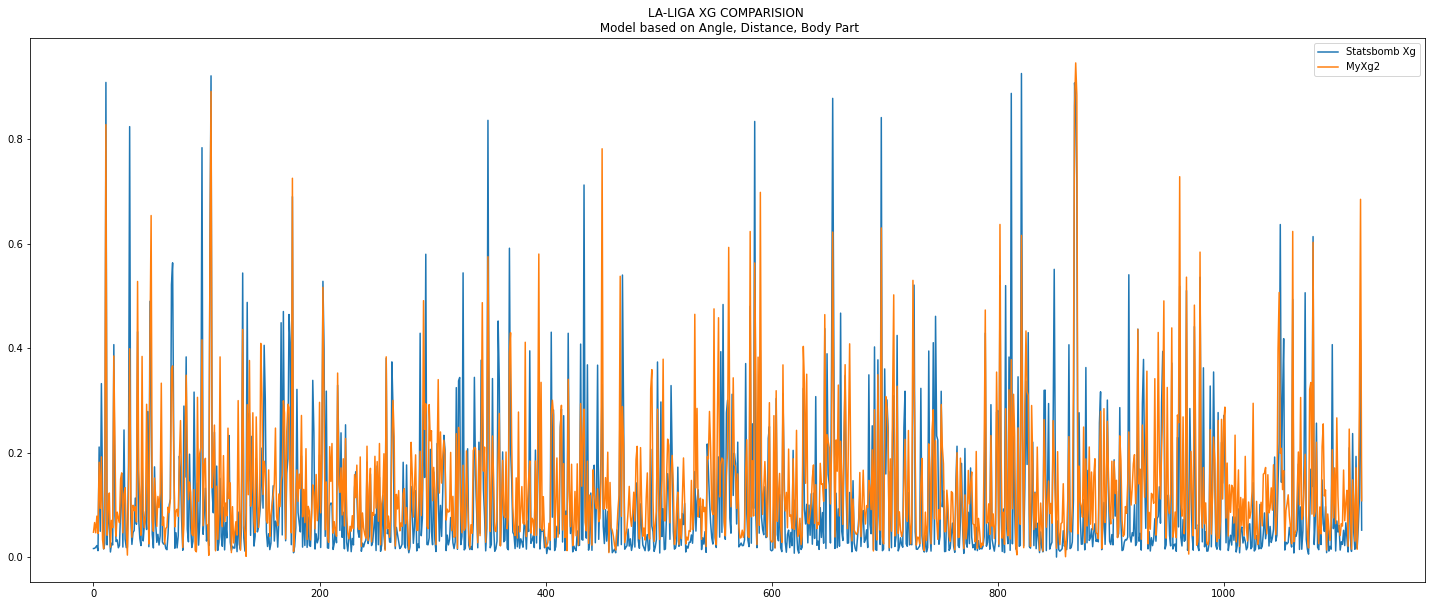

In [ ]:
#Ploting XGS for la liga test dataset
plt.figure(figsize=(25, 10))
plt.title("LA-LIGA XG COMPARISION \n Model based on Angle, Distance, Body Part")
plt.plot(statsXG2,label="Statsbomb Xg")
plt.plot(myXg2, label="MyXg2")
#plt.title("Angle, Distance, Body Part, Technique and Player count")
plt.legend()
plt.show()

## MODEL BASED ON ANGLE, DISTANCE, BODY PART, TECHNIQUE

In [ ]:
features = train_model[['Angle', 'Distance']]
body_tech = train_model[['shot_body_part', 'shot_technique']]
target = train_model[['shot_outcome']]

scaled = StandardScaler()
X_scaled = scaled.fit_transform(features)

all_data = np.concatenate((X_scaled, body_tech), 1)

X_train = all_data
y_train = target

print('Training features shape', X_train.shape)
print('Training target shape', y_train.shape)
print("**************************************")
#Model preperation for testing (I)

features_test = test_model[['Angle', 'Distance']]
body_tech_test = test_model[['shot_body_part', 'shot_technique']]
target_test = test_model[['shot_outcome']]
SbXG = test_model[['shot_statsbomb_xg']]

scaled = StandardScaler()
X_scaled_test = scaled.fit_transform(features_test)

all_data_test = np.concatenate((X_scaled_test, body_tech_test), 1)

X_test = all_data_test
y_test = target_test

print('Testing features shape', X_test.shape)
print('Testing target shape', y_test.shape)
print('Statsbomb XG shape', SbXG.shape)
print("**************************************")

#Model preperation on testing data (II)
features_test = test2_model[['Angle', 'Distance']]
body_tech_test = test2_model[['shot_body_part', 'shot_technique']]
target_test = test2_model[['shot_outcome']]
SbXG2 = test2_model[['shot_statsbomb_xg']]

scaled = StandardScaler()
X_scaled_test = scaled.fit_transform(features_test)

all_data_test = np.concatenate((X_scaled_test, body_tech_test), 1)

X_test2 = all_data_test
y_test2 = target_test

print('Testing features shape', X_test2.shape)
print('Testing target shape', y_test2.shape)
print('Statsbomb XG shape', SbXG2.shape)

Training features shape (10578, 4)
Training target shape (10578, 1)
**************************************
Testing features shape (397, 4)
Testing target shape (397, 1)
Statsbomb XG shape (397, 1)
**************************************
Testing features shape (1123, 4)
Testing target shape (1123, 1)
Statsbomb XG shape (1123, 1)


In [ ]:
model2 = LogisticRegression(fit_intercept=True, max_iter=20000)
model2.fit(X_train,  y_train)

#Model testing
predicted_classes1_2 = model2.predict(X_test)
predicted_classes2_2 = model2.predict(X_test2)

accuracy1 = accuracy_score(y_test,predicted_classes1_2)
accuracy2 = accuracy_score(y_test2,predicted_classes2_2)

p_pred1 = model2.predict_proba(X_test)
p_pred2 = model2.predict_proba(X_test2)


print("************{GOAL SCORED VS [ANGLE, DISTANCE, BODY PART AND TECHNIQUE]**************")

print('Model accuracy on champions league data: ', accuracy1)
print('Model accuracy on La-liga test data: ', accuracy2)

print('intercept:', model2.intercept_)
print('coef:', model2.coef_, end='\n\n')

#print('p_pred:', p_pred, sep='\n', end='\n\n')
#print('p_pred:', predicted_classes, sep='\n', end='\n\n')

#print(p_pred[0])

p_pred1[:,1].shape
p_pred2[:,1].shape

************{GOAL SCORED VS [ANGLE, DISTANCE, BODY PART AND TECHNIQUE]**************
Model accuracy on champions league data:  0.8967254408060453
Model accuracy on La-liga test data:  0.8833481745325023
intercept: [-1.27053529]
coef: [[ 0.3807844  -0.84458701 -0.56275679 -0.00558696]]



(1123,)

In [ ]:
statsXG = np.array(SbXG)
statsXG2 = np.array(SbXG2)

myXg = p_pred1[:,1].reshape(397,1)
myXg2 = p_pred2[:,1].reshape(1123,1)


diff = []
for i in range(len(statsXG)):
  dif = (statsXG[i] - myXg[i])**2
  diff.append(dif)

diff2 = []
for i in range(len(statsXG2)):
  dif = (statsXG2[i] - myXg2[i])**2
  diff2.append(dif)


print('Mean Squared Difference: ', np.mean(diff), end= "\n\n")
print('Mean Squared Difference2: ', np.mean(diff2), end= "\n\n")

Mean Squared Difference:  0.00982144164696035

Mean Squared Difference2:  0.010194139856418422



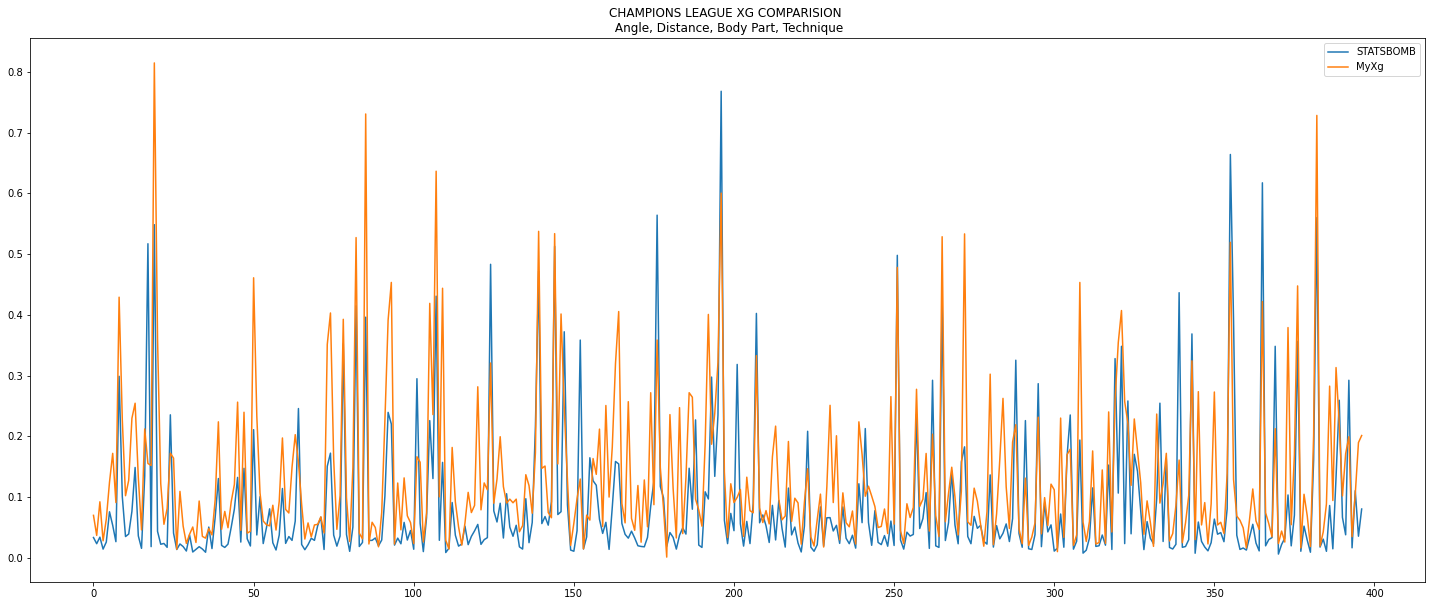

In [ ]:
#Ploting XGS for champions league test dataset
plt.figure(figsize=(25, 10))
plt.title("CHAMPIONS LEAGUE XG COMPARISION \n Angle, Distance, Body Part, Technique")
plt.plot(statsXG,label="STATSBOMB")
plt.plot(myXg, label="MyXg")
#plt.title("Angle, Distance, Body Part, Technique and Player count")
plt.legend()
plt.show()

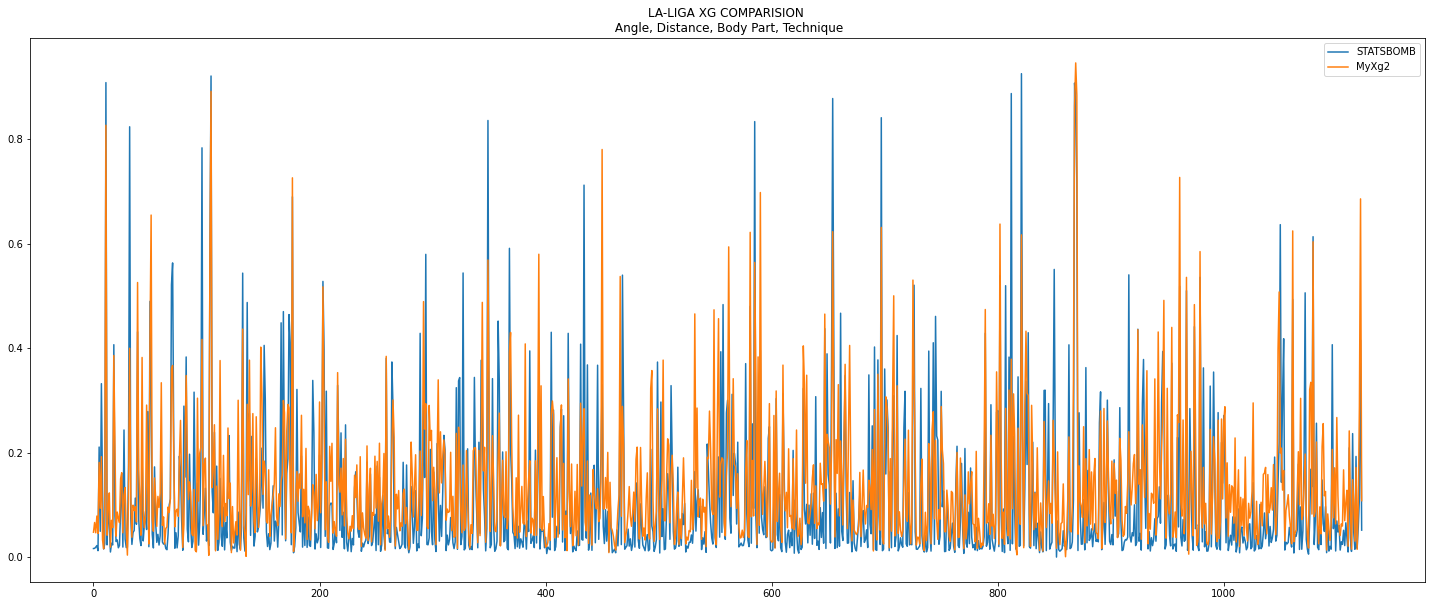

In [ ]:
#Ploting XGS for la liga test dataset
plt.figure(figsize=(25, 10))
plt.title("LA-LIGA XG COMPARISION \n Angle, Distance, Body Part, Technique")
plt.plot(statsXG2,label="STATSBOMB")
plt.plot(myXg2, label="MyXg2")
#plt.title("Angle, Distance, Body Part, Technique and Player count")
plt.legend()
plt.show()

## MODEL BASED ON ANGLE, DISTANCE, BODY PART, TECHNIQUE, PLAYER_COUNT




In [ ]:
#Model preperation for training data

features = train_model[['Angle', 'Distance']]
body_tech = train_model[['shot_body_part', 'shot_technique', 'Player_count']]
target = train_model[['shot_outcome']]

scaled = StandardScaler()
X_scaled = scaled.fit_transform(features)

all_data = np.concatenate((X_scaled, body_tech), 1)

X_train = all_data
y_train = target

print('Training features shape', X_train.shape)
print('Training target shape', y_train.shape)

Training features shape (10578, 5)
Training target shape (10578, 1)


In [ ]:
#Model preperation for testing (I)

features_test = test_model[['Angle', 'Distance']]
body_tech_test = test_model[['shot_body_part', 'shot_technique', 'Player_count']]
target_test = test_model[['shot_outcome']]
SbXG = test_model[['shot_statsbomb_xg']]

scaled = StandardScaler()
X_scaled_test = scaled.fit_transform(features_test)

all_data_test = np.concatenate((X_scaled_test, body_tech_test), 1)

X_test = all_data_test
y_test = target_test

print('Testing features shape', X_test.shape)
print('Testing target shape', y_test.shape)
print('Statsbomb XG shape', SbXG.shape)

Testing features shape (397, 5)
Testing target shape (397, 1)
Statsbomb XG shape (397, 1)


In [ ]:
#Model preperation on testing data (II)
features_test = test2_model[['Angle', 'Distance']]
body_tech_test = test2_model[['shot_body_part', 'shot_technique', 'Player_count']]
target_test = test2_model[['shot_outcome']]
SbXG2 = test2_model[['shot_statsbomb_xg']]

scaled = StandardScaler()
X_scaled_test = scaled.fit_transform(features_test)

all_data_test = np.concatenate((X_scaled_test, body_tech_test), 1)

X_test2 = all_data_test
y_test2 = target_test

print('Testing features shape', X_test2.shape)
print('Testing target shape', y_test2.shape)
print('Statsbomb XG shape', SbXG2.shape)

Testing features shape (1123, 5)
Testing target shape (1123, 1)
Statsbomb XG shape (1123, 1)


In [ ]:
#Model training

model = LogisticRegression(fit_intercept=True, max_iter=20000)
model.fit(X_train,  y_train)

#Model testing
predicted_classes1 = model.predict(X_test)
predicted_classes2 = model.predict(X_test2)

accuracy1 = accuracy_score(y_test,predicted_classes1)
accuracy2 = accuracy_score(y_test2,predicted_classes2)

p_pred1 = model.predict_proba(X_test)
p_pred2 = model.predict_proba(X_test2)


print("************{GOAL SCORED VS [ANGLE, DISTANCE, BODY PART, TECHNIQUE AND PLAYER COUNT]**************")

print('Model accuracy on champions league data: ', accuracy1)
print('Model accuracy on La-liga test data: ', accuracy2)

print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')

#print('p_pred:', p_pred, sep='\n', end='\n\n')
#print('p_pred:', predicted_classes, sep='\n', end='\n\n')

#print(p_pred[0])

p_pred1[:,1].shape
p_pred2[:,1].shape

************{GOAL SCORED VS [ANGLE, DISTANCE, BODY PART, TECHNIQUE AND PLAYER COUNT]**************
Model accuracy on champions league data:  0.8916876574307305
Model accuracy on La-liga test data:  0.8895814781834372
intercept: [-0.65627795]
coef: [[ 0.41373545 -0.67289586 -0.52431084  0.01057816 -0.45607352]]



(1123,)

In [ ]:
statsXG = np.array(SbXG)
statsXG2 = np.array(SbXG2)

myXg = p_pred1[:,1].reshape(397,1)
myXg2 = p_pred2[:,1].reshape(1123,1)


diff = []
for i in range(len(statsXG)):
  dif = (statsXG[i] - myXg[i])**2
  diff.append(dif)

diff2 = []
for i in range(len(statsXG2)):
  dif = (statsXG2[i] - myXg2[i])**2
  diff2.append(dif)


print('Mean Squared Difference: ', np.mean(diff), end= "\n\n")
print('Mean Squared Difference2: ', np.mean(diff2), end= "\n\n")


Mean Squared Difference:  0.008717497223298766

Mean Squared Difference2:  0.00804610924585172



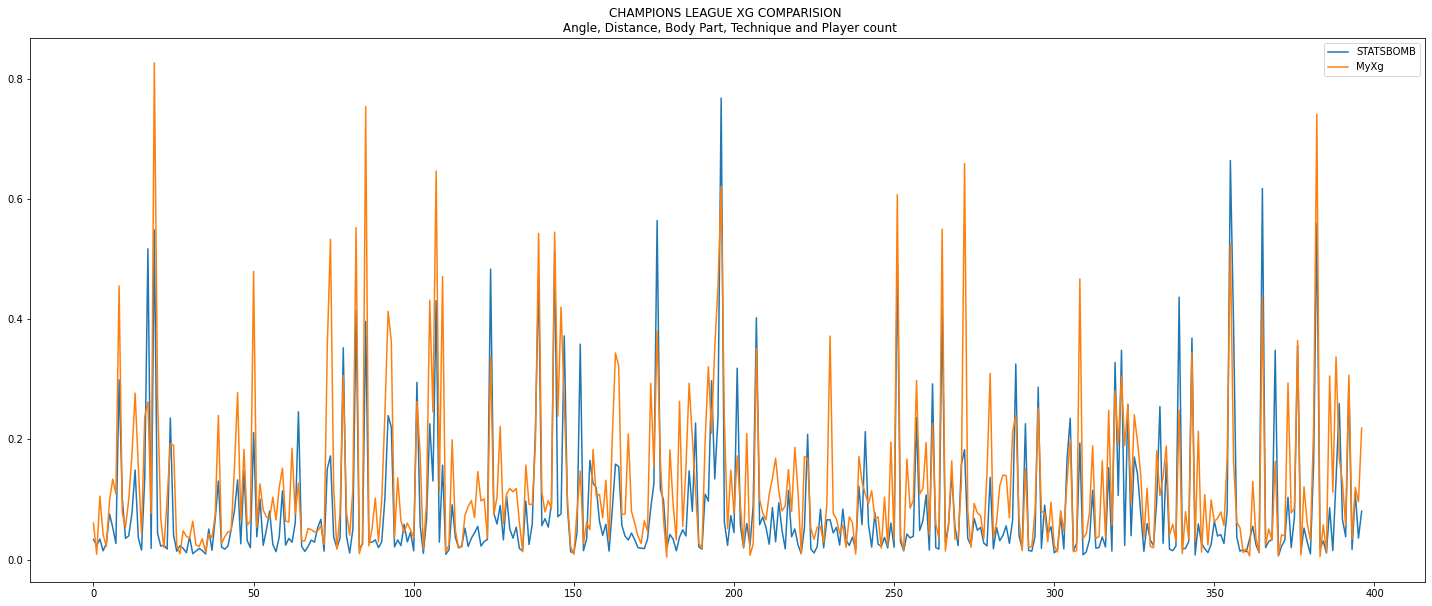

In [ ]:
#Ploting XGS for champions league test dataset
plt.figure(figsize=(25, 10))
plt.title("CHAMPIONS LEAGUE XG COMPARISION \n Angle, Distance, Body Part, Technique and Player count")
plt.plot(statsXG,label="STATSBOMB")
plt.plot(myXg, label="MyXg")
#plt.title("Angle, Distance, Body Part, Technique and Player count")
plt.legend()
plt.show()

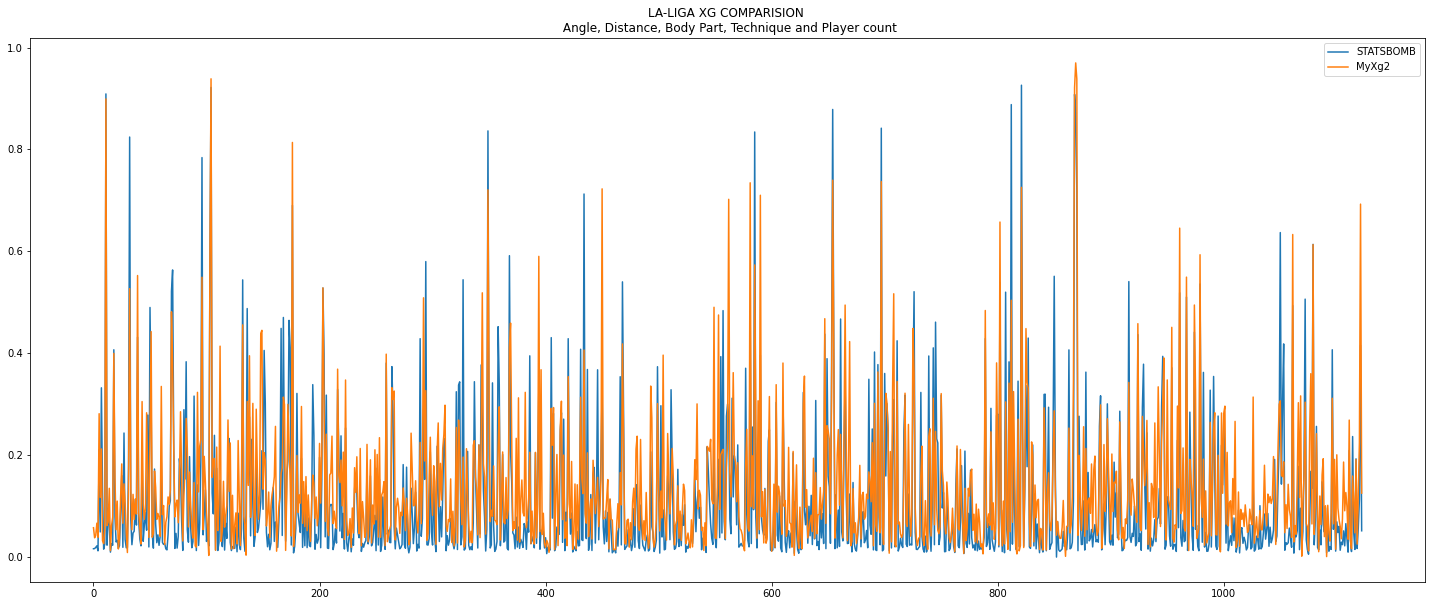

In [ ]:
#Ploting XGS for la liga test dataset
plt.figure(figsize=(25, 10))
plt.title("LA-LIGA XG COMPARISION \n Angle, Distance, Body Part, Technique and Player count")
plt.plot(statsXG2,label="STATSBOMB")
plt.plot(myXg2, label="MyXg2")
#plt.title("Angle, Distance, Body Part, Technique and Player count")
plt.legend()
plt.show()

# XGBOOST

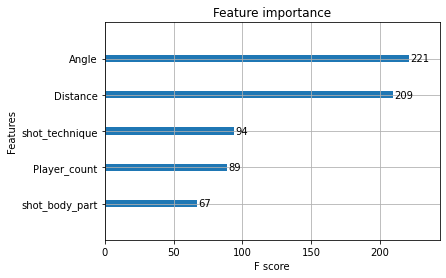

In [ ]:
import xgboost
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_model.get_booster().feature_names = ['Angle', 'Distance','shot_body_part', 'shot_technique', 'Player_count']
xgboost.plot_importance(xgb_model.get_booster())

# USING XG TO GET PROBABILITY RINGS

In [ ]:
#Model for ploting rings (angle and distance)
features = train_model[['Angle', 'Distance']]
target = train_model[['shot_outcome']]

test_features = test2_model[['Angle', 'Distance']]
test_target = test2_model[['shot_outcome']]


scaled = StandardScaler()
scaled_features = scaled.fit_transform(features)
test_scaled_features = scaled.fit_transform(test_features)

print(test_scaled_features)

model1 = LogisticRegression(fit_intercept=True, max_iter=20000)
model1.fit(scaled_features,  target)
predicted_classes = model1.predict(test_scaled_features)
accuracy = accuracy_score(test_target, predicted_classes)
p_pred = model1.predict_proba(test_scaled_features)

print("**********************{GOAL SCORED VS [ANGLE, DISTANCE]")
print('Accuracy: ',accuracy)
print('intercept:', model1.intercept_)
print('coef:', model1.coef_, end='\n\n')
# print('p_pred:', p_pred, sep='\n', end='\n\n')
# print('p_pred_class:', predicted_classes, sep='\n', end='\n\n')

print(p_pred[:,1])


[[-0.86106218 -0.35217194]
 [-0.48484038  0.73684866]
 [-0.7865854   1.04311817]
 ...
 [ 0.64387193 -0.83168838]
 [ 3.17298999 -1.67314151]
 [ 0.47390071 -0.79749175]]
**********************{GOAL SCORED VS [ANGLE, DISTANCE]
Accuracy:  0.8904719501335708
intercept: [-2.16904397]
coef: [[ 0.31546354 -0.72553462]]

[0.10109063 0.05434102 0.04015591 ... 0.20383313 0.51145819 0.19140018]


In [ ]:
def get_XG(row):
  p_pred = model1.predict_proba(row)
  Xg = p_pred[:,1]

  return Xg

In [ ]:
df = pd.DataFrame(columns = ['x','y','dist','angle'])

In [ ]:
for X in range(60,121):
  for Y in range(81):
    x = 120-X
    y = abs(Y-40)
    # print('X:',x)
    # print('Y:',y)
    dist = np.sqrt((x**2) + (y**2))
    if not(((x)**2 + abs(y)**2 - (8.00/2)**2) == 0):
      a = np.arctan((8.0 *(x)) /((x)**2 + abs(y)**2 - (8.00/2)**2))
      if a<0:
        a=np.pi+a
    else:
      a = 0
    #row = [[a,dist]]
    #xg = get_XG(row)
    df = df.append({'x' : X, 'y' : Y, 'dist' : dist, 'angle': a}, ignore_index = True)

In [ ]:
df

,x,y,dist,angle
0,60.0,0.0,72.111026,0.092329
1,60.0,1.0,71.561163,0.093750
2,60.0,2.0,71.021124,0.095177
3,60.0,3.0,70.491134,0.096609
4,60.0,4.0,69.971423,0.098045
...,...,...,...,...
4936,120.0,76.0,36.000000,0.000000
4937,120.0,77.0,37.000000,0.000000
4938,120.0,78.0,38.000000,0.000000
4939,120.0,79.0,39.000000,0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
features = df[['angle','dist']]
print(features.shape)
scaled = StandardScaler()
scaled_features = scaled.fit_transform(features)

print(scaled_features.shape)

XG = get_XG(scaled_features)
df['xg'] = XG

(4941, 2)
(4941, 2)


In [ ]:
df.tail()

,x,y,dist,angle,xg
4936,120.0,76.0,36.0,0.0,0.088229
4937,120.0,77.0,37.0,0.0,0.084532
4938,120.0,78.0,38.0,0.0,0.080977
4939,120.0,79.0,39.0,0.0,0.077558
4940,120.0,80.0,40.0,0.0,0.074272


In [ ]:
pgoal_2d=np.zeros((61,81))
arr =0
pgoal_2d[60][80]
for i in range(61):
  for j in range(81):
    # print("i",i)
    # print("j",j)
    pgoal_2d[i,j] =  XG[arr]
    arr = arr+1


In [ ]:
pgoal_2d.max()

0.9724644679561155

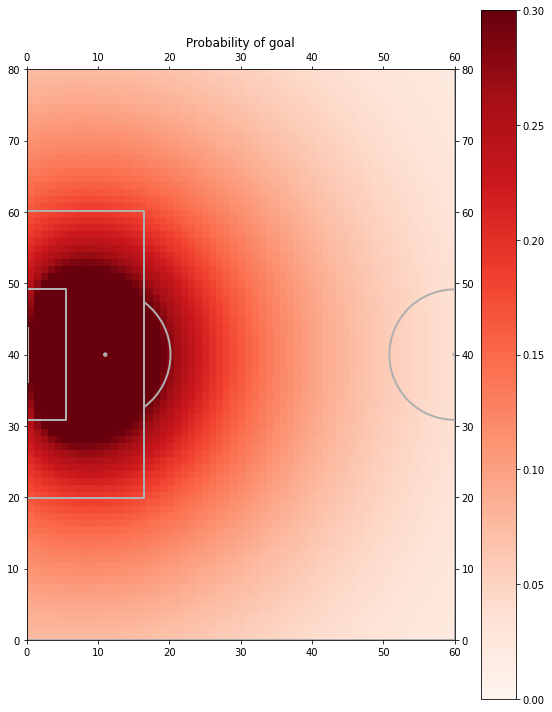

In [ ]:
pitch = Pitch(pitch_type='custom',pitch_length = 120, pitch_width = 80, half=False, axis=True, label=True, tick=True)
fig, ax = pitch.draw(figsize=(8, 10))
pos=ax.imshow(pgoal_2d.transpose(), extent=[60,0,0,80], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of goal')
plt.xlim((0,60))
plt.ylim((0,80))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()